In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv("diabetes_dataset.csv")

In [3]:
dataset.shape

(768, 9)

In [4]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


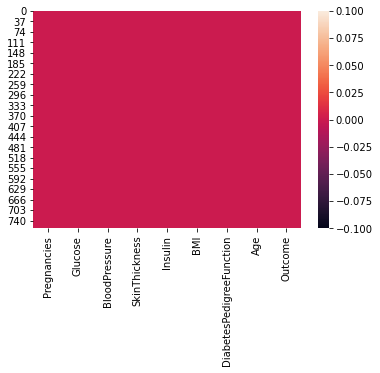

In [5]:
import seaborn as sn
sn.heatmap(dataset.isnull())

In [6]:
dataset.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [7]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
print("Diab : ",len(dataset[dataset['Outcome'] == 1]))
print("No diab : ",len(dataset[dataset['Outcome'] == 0]))

Diab :  268
No diab :  500


In [10]:
X = dataset.drop(axis=1, columns='Outcome')
Y = dataset['Outcome']

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 10)

In [12]:
from sklearn.ensemble import RandomForestClassifier
forset = RandomForestClassifier(n_estimators = 10, random_state=10)

In [13]:
forset.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=10, random_state=10)

In [14]:
from sklearn.metrics import accuracy_score
Y_predi = forset.predict(X_test)
accuracy_score(Y_test, Y_predi)

0.7445887445887446

In [15]:
from sklearn.svm import SVC

In [16]:
classify = SVC(kernel= 'linear', random_state=0)
classify.fit(X_train, Y_train)

SVC(kernel='linear', random_state=0)

In [17]:
svc_predict = classify.predict(X_test)
accuracy_score(Y_test, svc_predict)

0.7402597402597403

In [18]:
import xgboost
xbgclassify = xgboost.XGBClassifier()

In [19]:
#Hyperparamter Optimization
params = {
    'learning_rate':[0.05,0.10,0.15,0.20,0.25,0.30],
    'max_depth':[3,4,5,6,8,10,12,15],
    'min_child_weight':[1,3,5,7],
    'gamma':[0.1,0.2,0.3,0.4],
    'colsample_bytree':[0.3,0.4,0.5,0.7],
}

In [20]:
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(xbgclassify, param_distributions=params, scoring='roc_auc',n_jobs=-1,cv=5,verbose=3,random_state=10,)

In [21]:
model = random_search.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    6.2s finished
[23:12:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [22]:
model.best_params_

{'min_child_weight': 1,
 'max_depth': 3,
 'learning_rate': 0.05,
 'gamma': 0.4,
 'colsample_bytree': 0.4}

In [23]:
final_model = model.best_estimator_
y_predict = final_model.predict(X_test)

In [24]:
accuracy_score(Y_test, y_predict)

0.7402597402597403